# Pricing model for Rio de Janeiro Airbnbs  

At this script we will investigate using Airbnb's oficial data for Rio de Janeiro :


*   How concentrated is the market share of Airbnb’s stays for Rio de Janeiro?
*   What is the total market    of Airbnb in Rio de Janeiro?
* Which neighborhoods will I have more competition as a host ?
*   What neighbourhoods have the most expensive listings ?
*   What does it take as a host to get the most value per property?

To do this we will use the dataset listings.csv available in 
http://insideairbnb.com/get-the-data/



## Setup

### Libraries

In [151]:
!pip install bar_chart_race

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [152]:
import numpy as np # for math
import pandas as pd # to manage dataset
import matplotlib.pyplot as plt #for charts
from sklearn.ensemble import RandomForestRegressor # for Random Forest Model 
from sklearn.model_selection import train_test_split # for split train test
from sklearn.metrics import r2_score # for evalutate the model  
import seaborn as sns # for more beautiful charts
from scipy.stats import shapiro #to check normality
import xgboost as xgb # for XGBoost model
import bar_chart_race as bcr #for bar chart race animation video
%matplotlib inline 

###Display preferencis

In [153]:
pd.set_option('display.max_columns', None)

In [154]:
pd.set_option('display.max_rows', None)

In [155]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_theme(font_scale=1.4)

##Importing the data 



### Importing and Exploring

In [156]:
df_listing = pd.read_csv('/content/drive/MyDrive/DataScience/Udacity/Project1-RiodeJaneiroAirbnbs/listings.csv')
df_listing.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,15965441,https://www.airbnb.com/rooms/15965441,20220620202144,2022-06-20,Quarto de casal com vista para a Baía de Guana...,"Meu espaço é bom para casais, aventuras indivi...",NaN,https://a0.muscache.com/pictures/76550464-7859...,103691209,https://www.airbnb.com/users/show/103691209,José,2016-11-14,"Rio de Janeiro, State of Rio de Janeiro, Brazil",NaN,within an hour,83%,0%,f,https://a0.muscache.com/im/pictures/user/6e013...,https://a0.muscache.com/im/pictures/user/6e013...,NaN,3.0,3.0,"['email', 'phone']",t,t,NaN,Cocotá,NaN,-22.80630,-43.17788,Private room in rental unit,Private room,2,NaN,1 bath,1.0,1.0,"[""TV"", ""Washer"", ""Kitchen"", ""Lock on bedroom d...",$150.00,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,30,60,90,365,2022-06-20,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,3,0,3,0,NaN
1,47908784,https://www.airbnb.com/rooms/47908784,20220620202144,2022-06-20,"Apartamento bem localizado, bonito e familiar!",NaN,NaN,https://a0.muscache.com/pictures/f44537ff-72f1...,83985216,https://www.airbnb.com/users/show/83985216,Raquel,2016-07-15,"Rio de Janeiro, State of Rio de Janeiro, Brazil",NaN,within a day,50%,100%,f,https://a0.muscache.com/im/pictures/user/4b75c...,https://a0.muscache.com/im/pictures/user/4b75c...,NaN,1.0,1.0,['phone'],t,f,NaN,Freguesia (Jacarepaguá),NaN,-22.93633,-43.34907,Entire condo,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Body soap"", ""Dedicated workspace"", ""Cleaning...",$450.00,7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,0,0,0,52,2022-06-20,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
2,52239613,https://www.airbnb.com/rooms/52239613,20220620202144,2022-06-20,Apartamento com varanda e linda vista,"Condomínio com porteiro 24 horas , piscina, sa...",O condomínio fica em frente ao portão 2 do PRO...,https://a0.muscache.com/pictures/miso/Hosting-...,422870631,https://www.airbnb.com/users/show/422870631,Fabio,2021-09-13,"Petrópolis, State of Rio de Janeiro, Brazil",NaN,within a day,100%,89%,f,https://a0.muscache.com/im/pictures/user/e5a15...,https://a0.muscache.com/im/pictures/user/e5a15...,NaN,0.0,0.0,"['email', 'phone']",t,f,"Jacarepaguá, Rio de Janeiro, Brazil",Curicica,NaN,-22.96253,-43.40291,Entire rental unit,Entire home/apt,5,NaN,1 bath,2.0,5.0,"[""Microwave"", ""Extra pillows and blankets"", ""F...",$350.00,2,365,2,2,365,365,2.0,365.0,NaN,t,29,59,80,347,2022-06-20,9,9,0,2021-10-31,2022-05-15,5.00,5.00,5.00,4.89,4.78,4.78,4.89,NaN,f,1,1,0,0,1.16
3,10445855,https://www.airbnb.com/rooms/10445855,20220620202144,2022-06-20,"Campo dos Afonsos, Sulacap",Casa com vista para as instalações do Parque ...,"Bairro suburbano, tranquilo, seguro, casas bem...",https://a0.muscache.com/pictures/0f42e026-0955...,1647

## Cleaning the data

#### Removing missing for the variable we want to predict and analyze

In [157]:
df_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24881 entries, 0 to 24880
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24881 non-null  int64  
 1   listing_url                                   24881 non-null  object 
 2   scrape_id                                     24881 non-null  int64  
 3   last_scraped                                  24881 non-null  object 
 4   name                                          24860 non-null  object 
 5   description                                   23975 non-null  object 
 6   neighborhood_overview                         13370 non-null  object 
 7   picture_url                                   24881 non-null  object 
 8   host_id                                       24881 non-null  int64  
 9   host_url                                      24881 non-null 

In this case we don't have nulls in the variable we want to predict and analyze (price), but if in future analysis some nulls appear is important to remove in order to run the models.

In [158]:
#df_listing=df_listing.dropna(subset=['price'],axis=0)

#### Removing columns that only has null values

Some columns have only nulls. In this case there is no information in those fields to help any analysis we could do here. So I will remove them.

In [159]:
before = df_listing.shape
df_listing = df_listing.dropna(how='all', axis=1)
after = df_listing.shape
print(f'before: {before}, after:{after}')

before: (24881, 74), after:(24881, 70)


### Formating price column to value

Since price is a string we will convert to value

In [160]:
df_listing['price'].head()

0    $150.00
1    $450.00
2    $350.00
3    $145.00
4    $180.00
Name: price, dtype: object

In [161]:
df_listing['price_original']=df_listing['price']
df_listing['price']=df_listing['price'].str.replace('$','')
df_listing['price']=df_listing['price'].str.replace(',','')
df_listing['price'] = df_listing['price'].astype(float)

<ipython-input-161-a8f2e116ccf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listing['price_original']=df_listing['price']
<ipython-input-161-a8f2e116ccf7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listing['price']=df_listing['price'].str.replace('$','')
<ipython-input-161-a8f2e116ccf7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [162]:
df_listing.drop(columns='price_original',inplace=True)

Since price 0 or negative doesn't make sense we will remove them. 

In [163]:
df_listing=df_listing[df_listing['price']>0]

In order to ensure that we will only analyze listings that has believable chance to be demanded, we will narrow it to listings that have been booked and used. In this dataset we don't variables that show if a listing has been booked ans used. In this case our best proxy is 'number_of_reviews_ltm' that show number of reviews in the last twelve months. Since Airbnb wouldn't allow reviews to be made without use we will narrow our sample to only listings that has number_of_reviews_ltm >0.

In [164]:
df_listing=df_listing[df_listing['number_of_reviews_ltm']>0]

##Exploratory Analisys

### Understanding the market

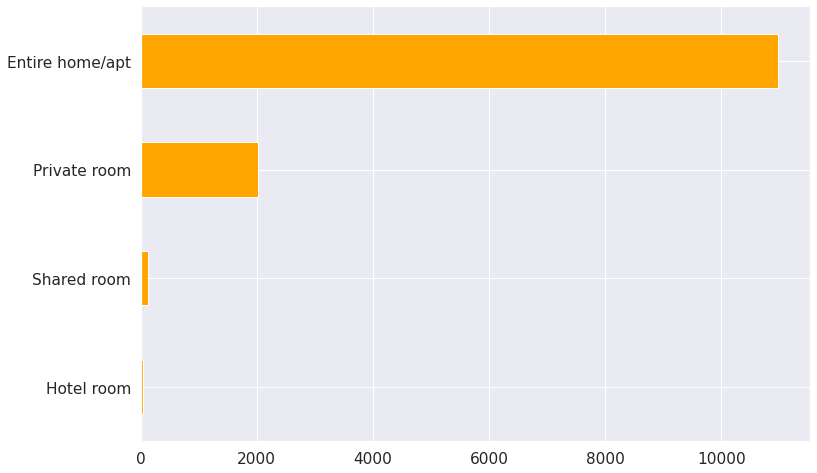

In [165]:
df_listing['room_type'].value_counts().sort_values(ascending=True).plot(kind='barh',color='orange')
plt.savefig('room_types_quantity.png',dpi=300,bbox_inches='tight')
plt.show()

As we can see above the majority of properties available are not designed to be shared with other people. Privacy seems important in this market.



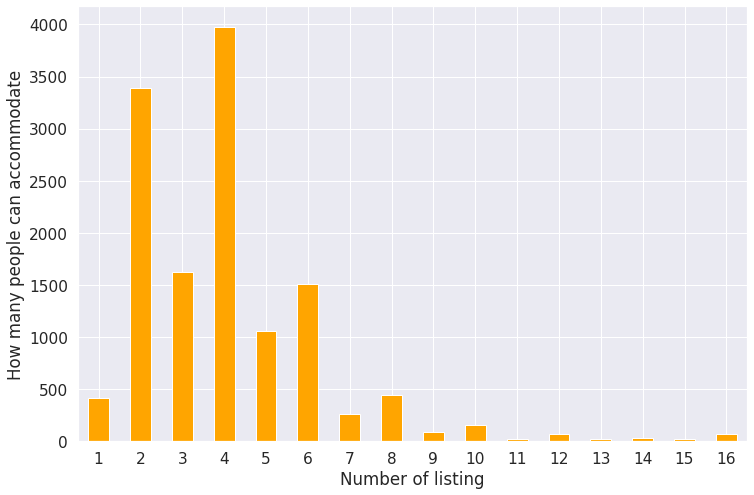

In [166]:
df_listing['accommodates'].value_counts().sort_index().plot(kind='bar',color='orange')
plt.ylabel('How many people can accommodate')
plt.xticks(rotation=0)
plt.xlabel('Number of listing')
plt.savefig('accommodates.png',dpi=300,bbox_inches='tight')
plt.show()

The majority of properties are designed to accommodate from 2 to 6 people.

### Exploring Price 

In [167]:
df_listing.price.describe()

count     13166.000000
mean        401.656312
std        1475.840208
min          34.000000
25%         157.250000
50%         250.000000
75%         400.000000
max      102811.000000
Name: price, dtype: float64

Prices go from BRL 34 (USD 6,65) to R$ 102.811 (USD 20k), with the majority of listings around BRL 250 (USD 49) per night. * using exchange rate of 2023-01-24 for Brazilian Real in Dollars 1 BRL = 0.1955 USD

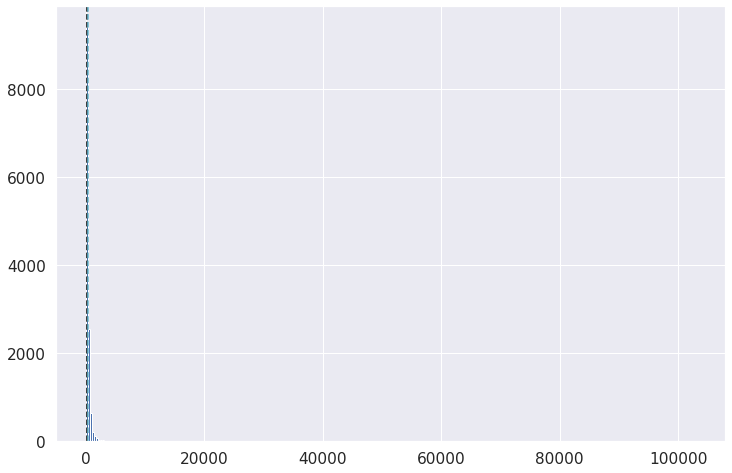

In [168]:
plt.hist(df_listing.price,bins=300)
plt.axvline(df_listing[df_listing['price']<1000].price.median(),color='black',ls='--')
plt.axvline(df_listing[df_listing['price']<1000].price.mean(),color='c',ls='--')
plt.savefig('hist_prices.png',dpi=300,bbox_inches='tight')
plt.show()

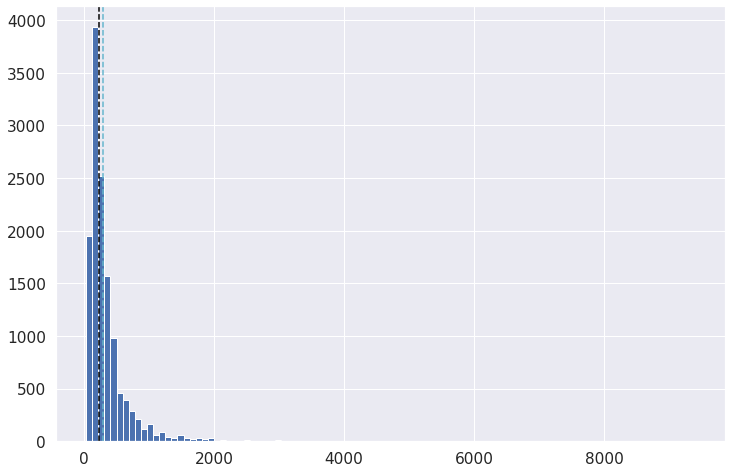

In [169]:
plt.hist(df_listing[df_listing['price']<10000].price,bins=100)
plt.axvline(df_listing[df_listing['price']<1000].price.median(),color='black',ls='--')
plt.axvline(df_listing[df_listing['price']<1000].price.mean(),color='c',ls='--')

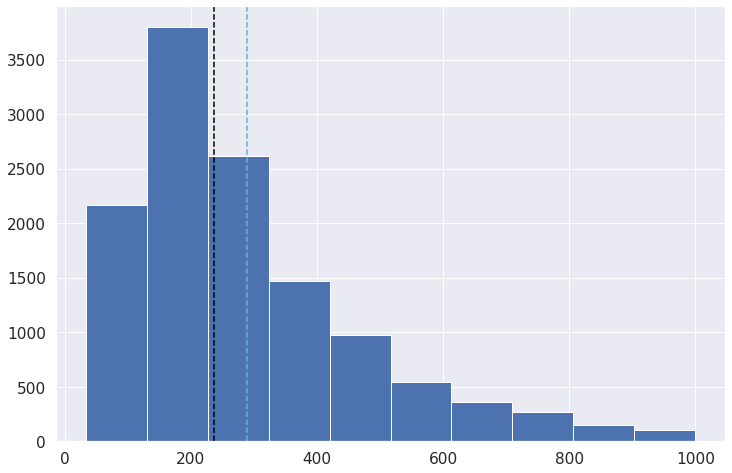

In [170]:
plt.hist(df_listing[df_listing['price']<1000].price)
plt.axvline(df_listing[df_listing['price']<1000].price.median(),color='black',ls='--')
plt.axvline(df_listing[df_listing['price']<1000].price.mean(),color='c',ls='--')
plt.savefig('hist_prices_zoom.png',dpi=300,bbox_inches='tight')
plt.show()

## Question 1 - How concentrated is the market share of Airbnb’s stays for Rio de Janeiro?

In [171]:
listing_per_host=df_listing.groupby(by='host_id')['id'].count().sort_values(ascending=False)
listing_per_host.head(10)

host_id
6000862      110
371026651    104
1982737       69
74463624      62
13580277      49
341887136     39
12909867      30
49207110      30
164822022     29
47584281      29
Name: id, dtype: int64

The host with more listings have 110 properties listed.

In [172]:
print(f'the top 20 hosts have {listing_per_host.head(20).sum()/len(df_listing)*100:.2f}% of the listings') 

the top 20 hosts have 6.05% of the listings


In [173]:
print(f'the top 20% of hosts have {listing_per_host.head(int(len(listing_per_host)*(0.20))).sum()/len(df_listing)*100:.2f}% of the listings') 

the top 20% of hosts have 47.94% of the listings


In [174]:
listing_total_prices_per_host=df_listing.groupby(by='host_id')['price'].sum().sort_values(ascending=False)

In [175]:
print(f'the top 20% of hosts have {listing_total_prices_per_host.head(int(len(listing_total_prices_per_host)*(0.20))).sum()/sum(listing_total_prices_per_host)*100:.2f}% of total listings in value') 

the top 20% of hosts have 64.94% of total listings in value


In [176]:
listing_per_host=pd.DataFrame(listing_per_host).rename(columns={'id':'count'})
listing_total_prices_per_host=pd.DataFrame(listing_total_prices_per_host)
listing_total_prices_per_host.join(listing_per_host).head(10)

,price,count
host_id,,
383997342,102811.0,1
5737780,91823.0,8
32429803,85000.0,2
371026651,66729.0,104
77709888,42255.0,20
6000862,41467.0,110
13580277,33774.0,49
1982737,33609.0,69
74463624,31274.0,62


Although the host that have the most properties listed have impressive 110, this host is not the one who could earn more per night. The top 1 has only 1 property but the value per night is so huge that made it to the top 1. 

This market is not concentrated: the top 20 hosts owns only 6.05% of the listings. and the Pareto’s principle (80% of consequences come from 20% of causes) doesn’t even apply here, as the top 20% of hosts have only 47.94% of listings in quantity and 64.94% in value.

## Question 2 - What is the total market of Airbnb in Rio de Janeiro?

In [177]:
print(f'The total market you will face of Airbnb in Rio de Janeiro currently is R${df_listing.price.sum():,.2f} per night')

The total market you will face of Airbnb in Rio de Janeiro currently is R$5,288,207.00 per night


## Question 3 -  Which neighborhoods will I have more competition as a host ?

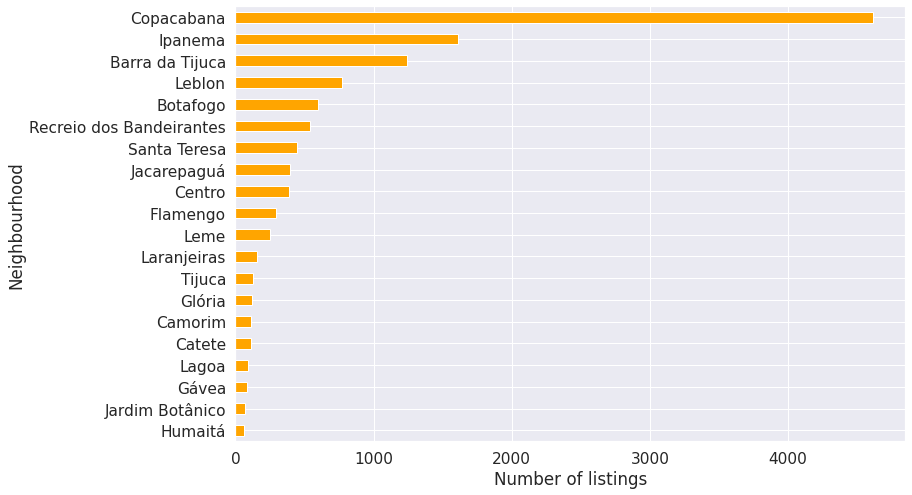

In [178]:
chart_h=df_listing.groupby(by='neighbourhood_cleansed')['price'].count()
chart_h.sort_values(ascending=False).head(20).sort_values(ascending=True).plot(kind='barh',color='orange') #just to make the chart fit better I selected only those abose median
plt.ylabel('Neighbourhood')
plt.xlabel('Number of listings')
plt.savefig('neighbourhoods_with_most_listings.png',dpi=300,bbox_inches='tight')
plt.show()

Copacabana is by far the neighborhood with the most competition you will have as a host.

## Question 4 - Which neighborhood is the most expensive

In [179]:
df_listing_exp=pd.DataFrame(df_listing.groupby(by='neighbourhood_cleansed')['price'].median().sort_values(ascending=False))
df_listing_exp=df_listing_exp.merge(pd.DataFrame(df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=False)).rename(columns={'price':'counts'}),on='neighbourhood_cleansed',how='left')

In [180]:
df_listing_exp.head(20)

,price,counts
neighbourhood_cleansed,,
Ribeira,1525.5,2
Joá,1167.5,34
Alto da Boa Vista,560.5,16
Vargem Grande,500.0,28
São Conrado,500.0,36
Leblon,450.0,770
Lagoa,399.5,88
Gávea,386.0,85
Ipanema,355.5,1610


In [181]:
df_listing[df_listing.neighbourhood_cleansed=='Ribeira'].price

3277       51.0
18774    3000.0
Name: price, dtype: float64

As we can see above the most expensive neighbourhood only has 2 listing to prove, wich is a very low sample to prove that point. In order to avoid these outliers effect we will remove the non-representative neighbourhoods from our analysis. 

#####Remove Neighbourhoods with non representative sample

In order to answer the question properly, I only looked into the median price of neighborhoods that have at least 20 listings.

In [182]:
neighbourhoods_price=df_listing.groupby(by='neighbourhood_cleansed')['price'].count().sort_values(ascending=False)
neighbourhood_sample_large_enough = neighbourhoods_price[neighbourhoods_price>=20]
df_listing_nr= df_listing[df_listing.neighbourhood_cleansed.isin(neighbourhood_sample_large_enough.index)]

In [183]:
df_listing_nr.groupby(by='neighbourhood_cleansed')['price'].median().sort_values(ascending=False)

neighbourhood_cleansed
Joá                         1167.5
Vargem Grande                500.0
São Conrado                  500.0
Leblon                       450.0
Lagoa                        399.5
Gávea                        386.0
Ipanema                      355.5
Barra da Tijuca              350.0
Guaratiba                    312.5
Recreio dos Bandeirantes     301.0
Barra de Guaratiba           295.0
Humaitá                      253.0
Leme                         239.5
Camorim                      235.0
Itanhangá                    233.5
Paquetá                      230.0
Jardim Botânico              229.0
Urca                         224.0
Copacabana                   223.0
Jacarepaguá                  219.0
Cosme Velho                  210.0
Laranjeiras                  200.0
Vargem Pequena               200.0
Vidigal                      190.0
Botafogo                     190.0
Catete                       185.0
Flamengo                     180.0
Jardim Guanabara             165

Text(neighbourhood_cleansed
Copacabana    223.0
Name: price, dtype: float64, neighbourhood_cleansed
Copacabana    4615
Name: counts, dtype: int64, 'Copacabana')

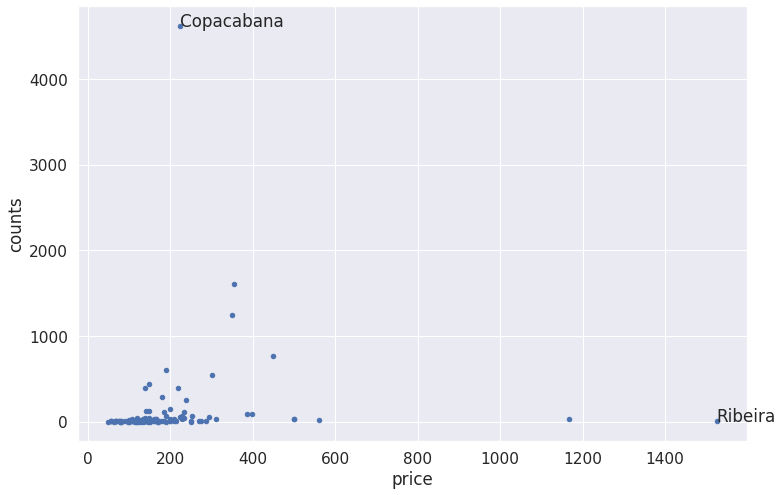

In [184]:
df_listing_exp.plot(kind='scatter',y='counts',x='price')
plt.annotate(df_listing_exp[df_listing_exp.price==df_listing_exp.price.max()].index[0]
             ,xy=(df_listing_exp[df_listing_exp.price==df_listing_exp.price.max()].price
                  ,df_listing_exp[df_listing_exp.price==df_listing_exp.price.max()].counts))
plt.annotate(df_listing_exp[df_listing_exp.counts==df_listing_exp.counts.max()].index[0]
             ,xy=(df_listing_exp[df_listing_exp.counts==df_listing_exp.counts.max()].price
                  ,df_listing_exp[df_listing_exp.counts==df_listing_exp.counts.max()].counts))

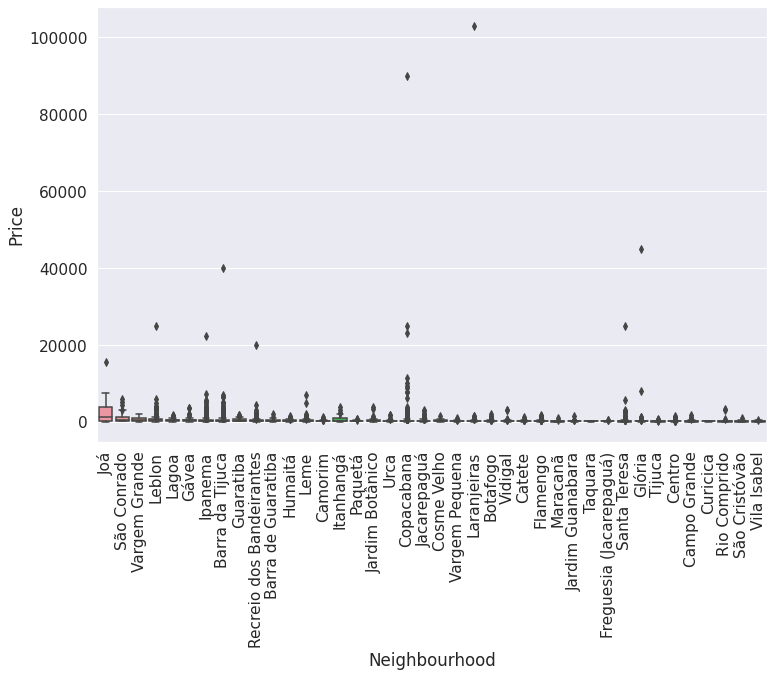

In [185]:
df_listing_nr_neighbourhoods=pd.DataFrame(df_listing_nr.groupby(by='neighbourhood_cleansed')['price'].median().sort_values(ascending=False))
df_listing_nr_neighbourhoods=df_listing_nr_neighbourhoods.rename(columns={'price':'price_neighbourhoods_median'})
df_listing_nr=df_listing_nr.merge(df_listing_nr_neighbourhoods,right_index=True,left_on='neighbourhood_cleansed',how='left')
df_listing_nr.sort_values(by='price_neighbourhoods_median',ascending=False,inplace=True)

sns.boxplot(y='price', x='neighbourhood_cleansed',data=df_listing_nr)
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Neighbourhood')
plt.savefig('neighbourhoods_with_most_expensive_listings.png',dpi=300,bbox_inches='tight')
plt.show()

Joa is the most expensive neighborhood for Airbnbs in Rio.

## Question 5 - What it takes as a host to get the most value per night  ?


Checking correlation between price and other variables

In [186]:
df_listing.corrwith(df_listing['price']).sort_values(ascending=False)

price                                           1.000000
bedrooms                                        0.245950
accommodates                                    0.164381
beds                                            0.130316
calculated_host_listings_count_entire_homes     0.035216
host_listings_count                             0.034097
host_total_listings_count                       0.034097
calculated_host_listings_count                  0.032108
availability_365                                0.026808
availability_90                                 0.018803
availability_30                                 0.017879
review_scores_location                          0.013219
availability_60                                 0.011039
review_scores_cleanliness                       0.003588
review_scores_checkin                           0.003099
review_scores_rating                            0.002784
maximum_nights                                  0.001992
id                             

###Preparing for Modelling

In order to answer the question we will deep dive more the a simple correlation 


1.   Using Categoricals
2.   Handling Missing Data
3.   Building Models 



#### Quantitative vs Categorical Data

In [187]:
df_listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.316600e+04,1.316600e+04,1.316600e+04,13056.000000,13056.000000,13166.000000,13166.000000,13166.000000,12284.000000,13093.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000,13166.000000
mean,6.176206e+16,2.022062e+13,1.302021e+08,7.938496,7.938496,-22.969036,-43.236212,4.050661,1.612097,2.542122,401.656312,3.420857,572.831764,3.026963,4.064332,734.552180,766.931490,3.243187,757.190605,17.130564,37.855917,55.162540,193.849461,29.138767,9.997266,0.724973,4.767746,4.800734,4.714946,4.880870,4.859856,4.872755,4.692872,8.089093,7.444326,0.579219,0.042686,1.020353
std,1.797368e+17,0.000000e+00,1.385379e+08,28.702448,28.702448,0.033540,0.090516,2.250294,0.935110,1.956681,1475.840208,16.849611,554.348767,6.625982,13.200054,547.976708,537.123447,6.765781,537.188635,11.393146,21.400533,29.002765,121.563275,46.030766,11.711878,1.241427,0.397426,0.398288,0.449460,0.326247,0.356028,0.311430,0.423611,20.446844,20.319280,1.517861,0.412859,1.061604
min,1.787800e+04,2.022062e+13,1.173900e+04,0.000000,0.000000,-23.073750,-43.769170,1.000000,1.000000,1.000000,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.020000
25%,1.670100e+07,2.022062e+13,1.520420e+07,1.000000,1.000000,-22.984647,-43.228060,2.000000,1.000000,1.000000,157.250000,2.000000,80.000000,2.000000,2.000000,90.000000,364.000000,2.000000,228.350000,6.000000,20.000000,35.000000,84.000000,4.000000,2.000000,0.000000,4.700000,4.770000,4.630000,4.880000,4.850000,4.860000,4.600000,1.000000,1.000000,0.000000,0.000000,0.280000
50%,4.047167e+07,2.022062e+13,6.910959e+07,2.000000,2.000000,-22.974750,-43.192590,4.000000,1.000000,2.000000,250.000000,2.000000,365.000000,2.000000,3.000000,1125.000000,1125.000000,2.100000,1125.000000,20.000000,45.000000,64.000000,176.000000,11.000000,5.000000,0.000000,4.890000,4.920000,4.860000,5.000000,4.990000,4.980000,4.790000,2.000000,1.000000,0.000000,0.000000,0.680000
75%,5.224104e+07,2.022062e+13,2.257975e+08,4.000000,4.000000,-22.962032,-43.184933,5.000000,2.000000,3.000000,400.000000,3.000000,1125.000000,3.000000,5.000000,1125.000000,1125.000000,3.000000,1125.000000,28.000000,58.000000,80.000000,323.000000,34.000000,14.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.970000,5.000000,3.000000,0.000000,0.000000,1.400000
max,6.508134e+17,2.022062e+13,4.644676e+08,518.000000,518.000000,-22.749690,-43.104400,16.000000,20.000000,45.000000,102811.000000,999.000000,30000.000000,400.000000,999.000000,30000.000000,30000.000000,400.000000,30000.000000,30.000000,60.000000,90.000000,365.000000,534.000000,189.000000,13.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,184.000000,179.000000,15.000000,9.000000,18.740000


We can see that 41 of 74 columns are quantitative  

In [188]:
df_listing.select_dtypes(include='object').describe(include='object')

,listing_url,last_scraped,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
count,13166,13166,13166,12802,8045,13166,13166,13056,13056,13035,6902,12339,12339,12935,13056,13056,13056,6466,13166,13056,13056,8045,13166,13166,13166,13153,13166,13166,13166,13166,13166,13166
unique,13166,2,12903,12402,7379,12989,8520,3087,3256,736,3830,4,70,93,2,8435,8435,96,8,2,2,207,123,62,4,40,12760,1,2,2601,354,2
top,https://www.airbnb.com/rooms/52239613,2022-06-21,Apartamento em Copacabana,Abrace a simplicidade neste lugar tranquilo e ...,A Barra da Tijuca é um bairro farto de grandes...,https://a0.muscache.com/pictures/cd211b30-a94b...,https://www.airbnb.com/users/show/6000862,Pineapples,2020-10-07,"Rio de Janeiro, State of Rio de Janeiro, Brazil",A Pineapples é o encontro de 2 administradores...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/20010...,https://a0.muscache.com/im/pictures/user/20010...,Copacabana,"['email', 'phone']",t,t,"Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,1 bath,"[""TV"", ""Washer"", ""Kitchen"", ""Wifi"", ""Long term...",t,2022-06-21,2022-01-02,2022-04-24,f
freq,1,12335,14,24,24,15,110,144,106,6819,104,7378,8655,4409,8929,104,104,2532,10604,12954,10798,2274,4615,8116,10983,6407,34,13166,12335,308,799,7740


### Removing Variables with unique values for each row

Variables that have unique values for each row won`t help our model such as id, because there is no way our model to predict it will happen again.  

In [189]:
def list_one_value_columns(df):
  ''' 
  this function returns the columns in a dataframe that only has unique values for each row

  input: dataframe
  output: print columns names that has unique values in each row
  '''
  col=df.columns
  print('columns that have unique values for each row:')
  for x in col:
    if len(df_listing[x].unique())==df_listing.shape[0]:
      print(x)

In [190]:
list_one_value_columns(df_listing)

columns that have unique values for each row:
id
listing_url


### Removing Variables with only one value for every row

I' m also  deleting the columns with only one value.

In [191]:
df_listing['has_availability'].unique()

array(['t'], dtype=object)

Since scrapped date are very simmilar and there is only two value I'll remove them too

In [192]:
df_listing.last_scraped.unique()

array(['2022-06-20', '2022-06-21'], dtype=object)

In [193]:
df_listing.calendar_last_scraped.unique()

array(['2022-06-20', '2022-06-21'], dtype=object)

In [194]:
df_listing.drop(columns=['scrape_id','has_availability','last_scraped','calendar_last_scraped','listing_url'],inplace=True)

### Handling Categorical Variables

The models we will use doesn't work reading text data. For each we will have to create dummies or convert to numbers.

#### Convert percentagens from strings to numbers

In [195]:
#removing the '%', convertind to integer and didinding by 100 
df_listing.host_response_rate = df_listing.host_response_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )
df_listing.host_acceptance_rate = df_listing.host_acceptance_rate.apply(lambda x: int(x[:len(x)-1])/100 if isinstance(x,str) else x )

####Convert bathrooms_text to number

In [196]:
df_listing.bathrooms_text.str.lower().unique()

array(['1 bath', '3 baths', '1 private bath', '4 baths', '1 shared bath',
       '3.5 baths', '2 baths', '2.5 baths', '4.5 baths', 'half-bath',
       '2 shared baths', '1.5 baths', '6.5 shared baths', '5 baths',
       '1.5 shared baths', '6 baths', '2.5 shared baths',
       '3 shared baths', '7.5 baths', '3.5 shared baths', '8 baths', nan,
       '5.5 baths', 'private half-bath', 'shared half-bath',
       '5 shared baths', '6.5 baths', '4 shared baths', '7 baths',
       '0 baths', '10 baths', '8.5 baths', '11 baths', '0 shared baths',
       '4.5 shared baths', '7 shared baths', '16 baths', '17 baths',
       '20 baths', '9 baths', '15 baths'], dtype=object)

In [197]:
# Transforming bathroom_text in values and multiplying by half if is half or shared bathroom
# if is null I will consider same as one shared bathroom
df_listing.bathrooms_text=df_listing.bathrooms_text.str.lower()
df_listing['quantity']=df_listing.bathrooms_text.str.extract('(\d+.\d+)').astype('float').fillna(df_listing.bathrooms_text.str.extract('(\d+)',).astype('float'))
df_listing.loc[df_listing.bathrooms_text.str.contains('shared').fillna(False),'bathroom']=0.5
df_listing.loc[df_listing.bathrooms_text.str.contains('half').fillna(False),'bathroom']=0.5
df_listing.loc[df_listing['bathroom']!=0.5,'bathroom']=1
df_listing.bathroom=df_listing.quantity * df_listing.bathroom

In [198]:
df_listing.drop(columns=['quantity',
                 'bathrooms_text'],inplace=True)

#### Evaluating description by lengh 

In [199]:
df_listing['description_percnumcharacters']=df_listing.description.str.len()
df_listing['description_percnumcharacters']=df_listing['description_percnumcharacters']/np.max(df_listing['description_percnumcharacters'])

#### String/Boolean to number

In [200]:
df_listing.instant_bookable=df_listing.instant_bookable.map({'t':1,'f':0})
df_listing.host_identity_verified=df_listing.host_identity_verified.map({'t':1,'f':0})
df_listing.host_has_profile_pic=df_listing.host_has_profile_pic.map({'t':1,'f':0})	 
df_listing.host_is_superhost=df_listing.host_is_superhost.map({'t':1,'f':0})

#### Date to number

In order to the model read the date I have to conert it to numbers. I will convert them to the difference of the date to today, so host_since for example will be days that that person is a host. So in this way I will measure the experience that this host has. Also other date will also be how long that dat is to today. 


In [201]:
df_listing['host_since']=pd.to_datetime(df_listing['host_since'])
df_listing['host_since'].fillna(pd.to_datetime("now"),inplace=True)
df_listing['host_since_indays']=pd.to_datetime("now") - pd.to_datetime(df_listing['host_since'])
df_listing.host_since_indays=df_listing.host_since_indays.dt.days

In [202]:
#measuring how long this property has been reviewd
df_listing['first_review_since_indays']=pd.to_datetime("now") - pd.to_datetime(df_listing['first_review'])
df_listing.first_review_since_indays=df_listing.first_review_since_indays.dt.days

In [203]:
#measuring how recent the reviews are 
df_listing['last_review_since_indays']=pd.to_datetime("now") - pd.to_datetime(df_listing['last_review'])
df_listing.last_review_since_indays=df_listing.last_review_since_indays.dt.days

In [204]:
df_listing=df_listing.drop(columns=['host_since','first_review','last_review','description'])

In [205]:
df_listing.select_dtypes('object').columns

Index(['name', 'neighborhood_overview', 'picture_url', 'host_url', 'host_name',
       'host_location', 'host_about', 'host_response_time',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'amenities'],
      dtype='object')

There are still some categorical left to handle 

#### Creating Dummy for Nulls

In order to not miss the information of missings in the database, I will build those varieables before handling missings. In order to not miss the information of missings in the database, I will build those varieables before handling missings. I have the hypothesis that the lack of information harms the customer's willingness to book and consequently reduces the price


In [206]:
nulls=df_listing.isnull().astype(int).sum() #Convert Boolean to int
nulls=nulls[nulls!=0] #Remove _missing column with single value 0
nulls=nulls[nulls!=1] #Remove _missing column with single value 1
nulls=nulls[nulls!=nulls.shape[0]].index 
df_listing=df_listing.join(df_listing[nulls].isnull().astype(int),rsuffix='_missing')

#### Removing Categorical Non Explanatory Variables Before Get Dummies
Before getting dummies, I will delete categoricals that have more than 100 unique values. This is because get_dummies would generate a huge amount of columns (more than 100 to each categorical) and thus will be deleted to not have future performance issues. In this case the exception is neighbourhood_cleanse.I have a hypothesis that neighborhood can be a variable that has a high   influence over price. 

 


In [207]:
df_listing.select_dtypes(include='object').describe(include='object')

,name,neighborhood_overview,picture_url,host_url,host_name,host_location,host_about,host_response_time,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,neighbourhood,neighbourhood_cleansed,property_type,room_type,amenities
count,13166,8045,13166,13166,13056,13035,6902,12339,13056,13056,6466,13166,8045,13166,13166,13166,13166
unique,12903,7379,12989,8520,3087,736,3830,4,8435,8435,96,8,207,123,62,4,12760
top,Apartamento em Copacabana,A Barra da Tijuca é um bairro farto de grandes...,https://a0.muscache.com/pictures/cd211b30-a94b...,https://www.airbnb.com/users/show/6000862,Pineapples,"Rio de Janeiro, State of Rio de Janeiro, Brazil",A Pineapples é o encontro de 2 administradores...,within an hour,https://a0.muscache.com/im/pictures/user/20010...,https://a0.muscache.com/im/pictures/user/20010...,Copacabana,"['email', 'phone']","Rio de Janeiro, Brazil",Copacabana,Entire rental unit,Entire home/apt,"[""TV"", ""Washer"", ""Kitchen"", ""Wifi"", ""Long term..."
freq,14,24,15,110,144,6819,104,7378,104,104,2532,10604,2274,4615,8116,10983,34


In [208]:
#neighbourhood will alse be deleted duo to neighbourhood_cleansed column that have the same information but more complete. host_verifications is a Airbnb internal data so I will delete as well
df_listing.drop(columns=['name','neighborhood_overview',	'picture_url','host_url','host_name','host_location','host_about','neighbourhood','host_thumbnail_url',	'host_picture_url','host_verifications'
                         ,'amenities','id','host_id'],inplace=True)   

Now that we don't have those categoricals with features per listing that would make our table too large, I will run the get_dummies for all categorical variables.

In [209]:
df_listing=pd.get_dummies(df_listing,dummy_na=True,drop_first=True)

### Handling Missing Data

Let's check how many nulls we have here:

In [210]:
df_listing.columns[df_listing.isnull().sum()>0]

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'bedrooms', 'beds',
       'bathroom', 'description_percnumcharacters'],
      dtype='object')

#### Removing Redundant Columns

Some columns might have   nulls  in  the the same rows. In this case, some columns in the get_dummies could carry the same information. In order to check which columns are exactly the same and keeping only one of them in order to remove redundancy we will indentify them below 

In [211]:
for ci in df_listing.columns:
  for cj in df_listing.columns:
    if ci!=cj and df_listing[ci].equals(df_listing[cj])==True:
      print(ci,cj)

host_listings_count host_total_listings_count
host_total_listings_count host_listings_count
neighborhood_overview_missing neighbourhood_missing
host_name_missing host_is_superhost_missing
host_name_missing host_thumbnail_url_missing
host_name_missing host_picture_url_missing
host_name_missing host_listings_count_missing
host_name_missing host_total_listings_count_missing
host_name_missing host_has_profile_pic_missing
host_name_missing host_identity_verified_missing
host_response_time_missing host_response_rate_missing
host_response_rate_missing host_response_time_missing
host_is_superhost_missing host_name_missing
host_is_superhost_missing host_thumbnail_url_missing
host_is_superhost_missing host_picture_url_missing
host_is_superhost_missing host_listings_count_missing
host_is_superhost_missing host_total_listings_count_missing
host_is_superhost_missing host_has_profile_pic_missing
host_is_superhost_missing host_identity_verified_missing
host_thumbnail_url_missing host_name_missing
hos

Now that we have the columns that are redundant we will remove one of them

In [212]:
df_listing.drop(columns=['neighbourhood_cleansed_nan','property_type_nan',
                         'host_total_listings_count','neighborhood_overview_missing',
                          'host_response_time_missing',
                          'host_is_superhost_missing',
                          'host_thumbnail_url_missing',
                          'host_picture_url_missing',
                          'host_listings_count_missing',
                          'host_total_listings_count_missing',
                          'host_has_profile_pic_missing',
                          'host_identity_verified_missing'],inplace=True)

#### Fill Nulls

I will check what columns has nulls now

In [213]:
df_listing.columns[df_listing.isnull().sum()>0]

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'bedrooms', 'beds', 'bathroom', 'description_percnumcharacters'],
      dtype='object')

For columns that register missing information and the column that I use to count description's characters I will fill with 0.

In [214]:
df_listing.host_has_profile_pic.fillna(0,inplace=True)
df_listing.host_is_superhost.fillna(0,inplace=True)
df_listing.host_identity_verified.fillna(0,inplace=True)
df_listing.host_listings_count.fillna(0,inplace=True)

When there is no zero value I will assume that null was used to represent that number.  To those that has zero, in order to avoid outliers effect I will use median instead of mean.

In [215]:
def fill_miss(df):
  '''
  fillna with median for all columns that have zero and zero for those that have zero

  input: dataframe
  output: dataframe with fillna applied
  '''  
  col=df.columns
  for x in col:
    if df[x].isnull().sum()>0:
      if df[df[x]==0][x].count()==0:
        df[x].fillna(0,inplace=True)
        print('fillna with 0 for: ', x)
      else:
        df[x].fillna(df[x].median(),inplace=True)
        print('fillna with median for: ', x)

In [216]:
fill_miss(df_listing)

fillna with median for:  host_response_rate
fillna with median for:  host_acceptance_rate
fillna with 0 for:  bedrooms
fillna with 0 for:  beds
fillna with median for:  bathroom
fillna with 0 for:  description_percnumcharacters


In [217]:
print(f'we have {sum(df_listing.isnull().sum())} nulls on the dataset')

we have 0 nulls on the dataset


### Test normal distribution

In [218]:
shapiro(df_listing.price)

/usr/local/lib/python3.8/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.09015011787414551, pvalue=0.0)

Let's use 5% of significance to our tests. Since pvalue is lower than 5% than price is not normally distributed. Therefore we will try to make it normally distributed by log transformation.

In [219]:
df_listing['price_log']=np.log10(df_listing['price'])

## Modelling

In [220]:
X = df_listing.drop(columns=['price','price_log'])
y = df_listing['price_log']

In [221]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42)

### Random Forest

In [222]:
#Import model setting
rf = RandomForestRegressor(n_estimators=300, 
                               criterion='squared_error', 
                               random_state=42)
#Training
rf.fit(X_train, y_train.squeeze())

#Calculating scores
y_train_preds = rf.predict(X_train)
y_test_preds = rf.predict(X_test)

print(f'R2 train: { r2_score(y_train, y_train_preds):.2f}')
print(f'R2 test: { r2_score(y_test, y_test_preds):.2f}')


R2 train: 0.95
R2 test: 0.69


In [223]:
rf_feature_importances = pd.DataFrame(zip(X_train.columns, rf.feature_importances_),columns=['feature','importance_score']).sort_values(by='importance_score',ascending=False)

In [224]:
feature_compare=''

In [225]:
feature_compare=rf_feature_importances.reset_index(drop=True)
feature_compare['Rank']=feature_compare.index +1

In [226]:
rf_feature_importances['model']='Random Forest'

###XGBoost

In [227]:
#Import model setting
xgbr = xgb.XGBRegressor(n_estimators=300, 
                               criterion='squared_error', 
                               random_state=42)

#Trainig
xgbr.fit(X_train, y_train)

#Calculating scores
y_train_preds = xgbr.predict(X_train)
y_test_preds = xgbr.predict(X_test)

print(f'R2 train: { r2_score(y_train, y_train_preds):.2f}')
print(f'R2 test: { r2_score(y_test, y_test_preds):.2f}')

[04:27:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 train: 0.76
R2 test: 0.70


In this Case XGBoost had the best result with 0,7 R²

In [228]:
xgbr_feature_importances = pd.DataFrame(zip(X_train.columns, xgbr.feature_importances_),columns=['feature','importance_score']).sort_values(by='importance_score',ascending=False)

### Results 

In order to compare both models feature importance I will make a tabel ranking each feature importance of each model

In [229]:
feature_compare.rename(columns={'importance_score':'importance_score_random_forest'})
feature_compare=feature_compare.join(xgbr_feature_importances.reset_index(drop=True),rsuffix='_xgboost')
feature_compare

,feature,importance_score,Rank,feature_xgboost,importance_score_xgboost
0,bathroom,2.223038e-01,1,bedrooms,0.160734
1,bedrooms,1.860975e-01,2,bathroom,0.153878
2,latitude,9.133560e-02,3,room_type_Private room,0.064271
3,longitude,3.690066e-02,4,calculated_host_listings_count_entire_homes,0.039237
4,last_review_since_indays,3.555066e-02,5,latitude,0.033008
5,room_type_Private room,2.710032e-02,6,accommodates,0.030819
6,calculated_host_listings_count_entire_homes,2.697823e-02,7,room_type_Shared room,0.028167
7,reviews_per_month,2.342432e-02,8,availability_90,0.023765
8,accommodates,2.295225e-02,9,neighbourhood_cleansed_Leblon,0.023130
9,availability_90,2.115437e-02,10,neighbourhood_cleansed_Ipanema,0.018968


1. Interesting that besides both models agreeing with that badrooms and bathroooms are the most important features, they disagre wich is more important. 
2. xgboost attribute a way lower importance of longitude than random forest: for random forest this is the 3º most important while for xgboost it is 21º.

In order to visualize better the change between both models I will make this table in to a bar chart race animation showing the model as a Random Forest changing in to the XGBosst result

In [ ]:
xgbr_feature_importances['model']='XGBoost'
feature_importance_chart=rf_feature_importances.pivot(columns='feature',values='importance_score',index='model').append(
                          xgbr_feature_importances.pivot(columns='feature',values='importance_score',index='model'))

feature_importance_chart =feature_importance_chart * 100
bcr.bar_chart_race(df=feature_importance_chart,n_bars=15, steps_per_period=200,period_length=7000,filename='Airbnb_feature_importance_xgb_vs_rf.mp4')

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 132 missing from current font.
  font.set_text(s, 0.0,

## Conclusion

* Number of bedrooms and bathrooms are by far the most important features.
* Having more bedrooms are more important than having more bathrooms.
* Private rooms are preferable.
* Hosts that have more listings in Airbnbs may charge more.
* Being closer to a specific latitude is more important than by longitude (east and west is more important than north and south).
*The best neighborhood to chose is Leblon. Although Joa in a first analysis seem to be a better neighborhood to get higher prices for your listing, the model have showed that there are other features in those listings there that explain better the higher prices than the location. When it comes to location Leblon is the place that you probably will get the best price for your property).
*Being available in the next 90 days matters more than 30, 60 and 365 days.
Locations reviews score is the most important among the attributes reviewed (overall rating, listing accuracy, cleanliness, checkin, host communication, location and value).
*Location Score according to Airbnb: Was the guest made aware of safety, transportation, points of interest and special considerations like noise or other situations that might affect their stay?
*Having a good and recent review score is more important than having a lot of reviews.
* number of beds doesn't seem to be as important as the number of bedrooms. Perhaps that information already is satisfy by the rooms' picture or description
* host response rate and neighboorhood are the fields that have some nulls but is important fill in.